In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json('dataset/label_data.json', lines=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lanes      2858 non-null   object
 1   h_samples  2858 non-null   object
 2   raw_file   2858 non-null   object
dtypes: object(3)
memory usage: 67.1+ KB


In [4]:
len(data['lanes'][0][0])

48

In [5]:
len(data['h_samples'][0])

48

In [6]:
points = zip(data['lanes'][0][0],data['h_samples'][0])

In [7]:
img_path = data.raw_file[0]
print(img_path)

clips/0313-1/6040/20.jpg


In [8]:
frame = plt.imread('dataset/'+img_path)

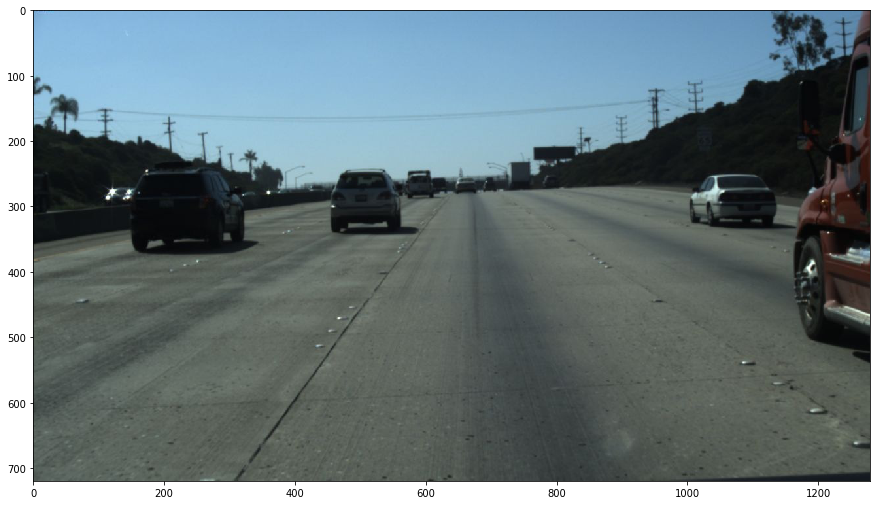

In [9]:
fig = plt.figure(figsize=(15,15))
plt.imshow(frame)

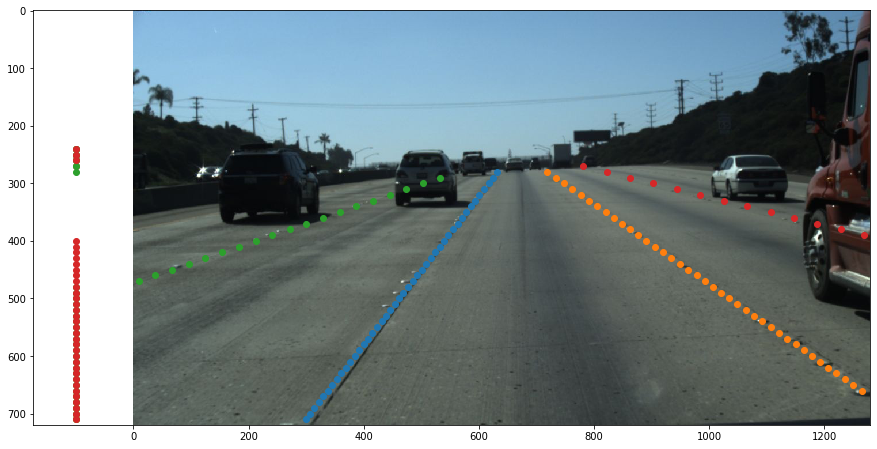

In [10]:
fig = plt.figure(figsize=(15,15))
plt.imshow(frame)
plt.scatter(data['lanes'][0][0],data['h_samples'][0])
plt.scatter(data['lanes'][0][1],data['h_samples'][0])
plt.scatter(data['lanes'][0][2],data['h_samples'][0])
plt.scatter(data['lanes'][0][3],data['h_samples'][0])

In [11]:
def imshow(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [12]:
sample = 0

In [13]:
img_path = data.raw_file[sample]

In [14]:
img_raw = cv2.imread('dataset/'+img_path)

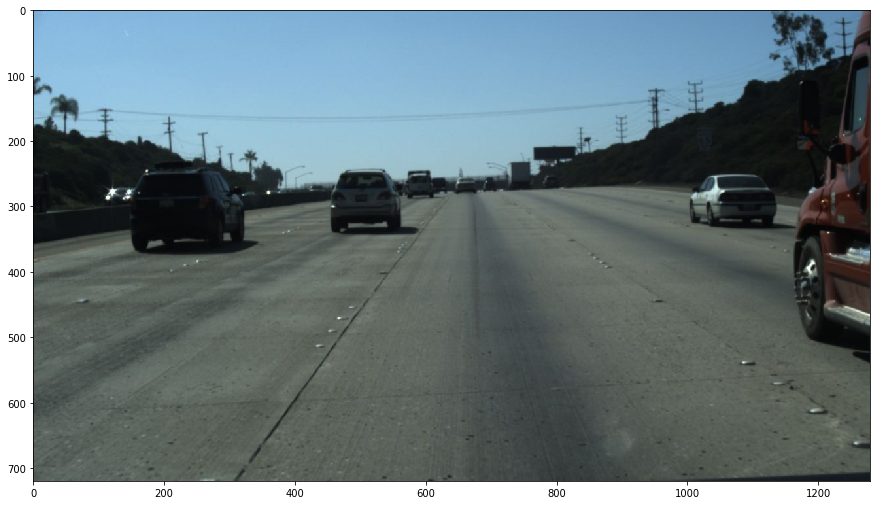

In [15]:
fig = plt.figure(figsize=(15,15))
imshow(img_raw)

In [16]:
def get_lane_mask(sample,lane_idx):
    points_lane = []
    h_max = np.max(data['h_samples'][sample])
    h_min = np.min(data['h_samples'][sample])
    x_idx = data['lanes'][sample][lane_idx]
    y_idx = data['h_samples'][sample]
    for x,y in zip(x_idx,y_idx):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x-offset/2,y])
    x_idx_=x_idx.copy()
    y_idx_=y_idx.copy()
    x_idx_.reverse()
    y_idx_.reverse()
    for x,y in zip(x_idx_,y_idx_):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x+offset/2,y])
    return points_lane
# get_lane_mask(0,0)

In [17]:
def create_lane_mask(sample):
    img_path = data.raw_file[sample]
    img_raw = cv2.imread('dataset/'+img_path)
    laneMask = np.zeros(img_raw.shape, dtype=np.uint8)
    for lane_idx in range(len(data.lanes[sample])):
        points_lane = get_lane_mask(sample,lane_idx)
        pts = np.array(points_lane, np.int32)
        pts = pts.reshape((-1,1,2))
        laneMask = cv2.fillPoly(laneMask,[pts],(255,255,255))
    return(img_raw, laneMask)
#     imshow(laneMask)

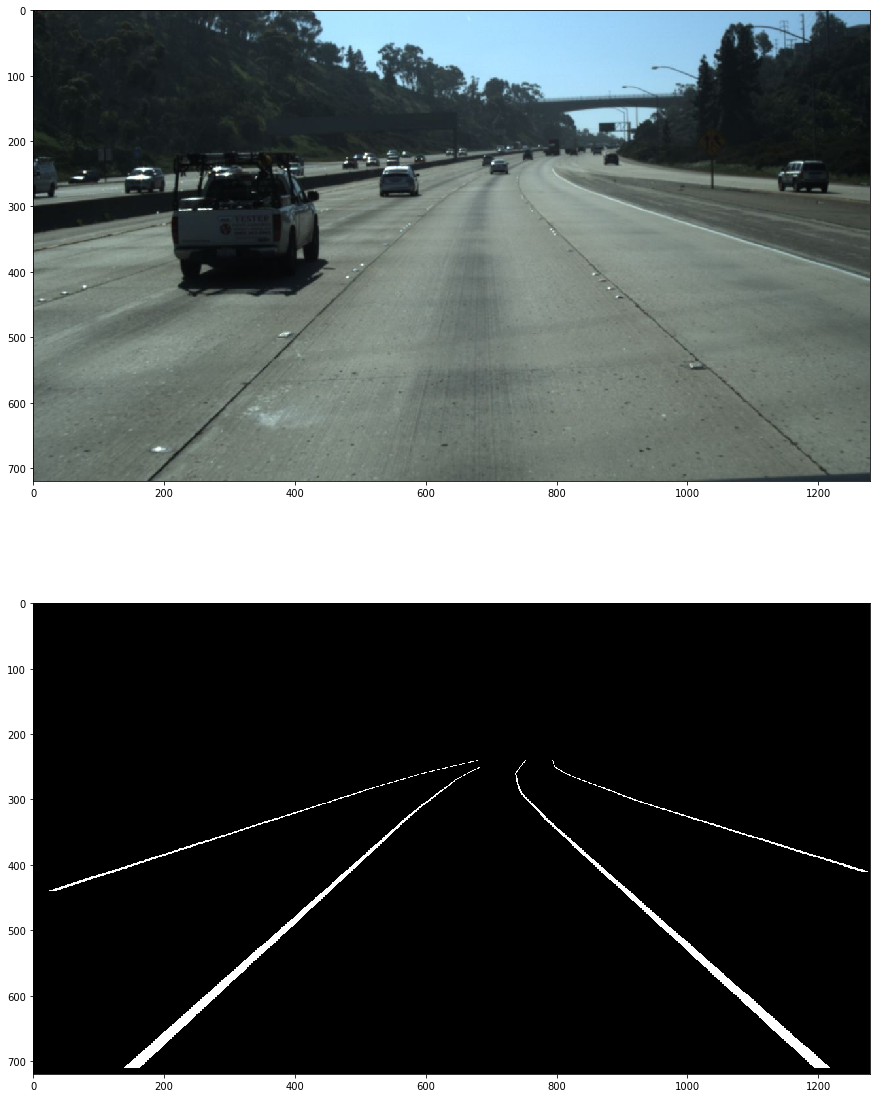

In [24]:
img_, mask = create_lane_mask(19)
fig = plt.figure(figsize=(15,20))
plt.subplot(211)
imshow(img_)
plt.subplot(212)
imshow(mask)

In [ ]:
'''
i = 0 -> 1, 2
i = 1 -> 3, 4
i = 2 -> 5, 6
i =  -> 3, 4
'''